La dimension del arrelo es (50, 200)


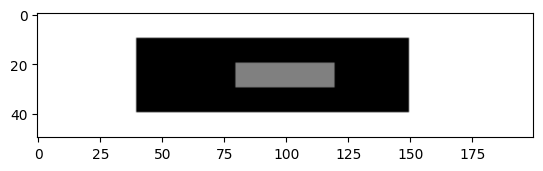

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alto = 50
ancho = 200
mi_arreglo = np.zeros((alto,ancho))

print('La dimension del arrelo es',mi_arreglo.shape)
#mi_arreglo[10,10] = 1
mi_arreglo[10:40,40:150]=1
mi_arreglo[20:30,80:120]=0.5
plt.imshow(-mi_arreglo, cmap='gray')

(675, 1200)


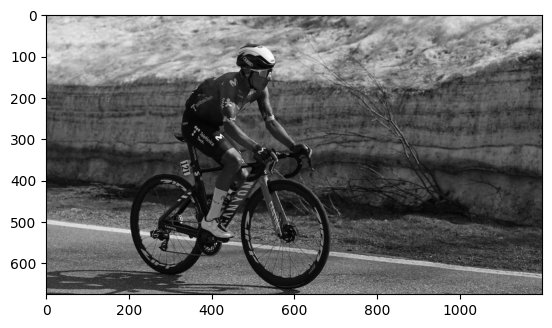

In [ ]:
import cv2
arch = 'bici.jpg'
img_tmp=plt.imread(arch)
img_tmp_2=cv2.imread(arch,0)
#plt.imshow(img_tmp)
print(img_tmp_2.shape)
plt.imshow(img_tmp_2,cmap='gray')

In [ ]:
import keras
from keras.layers import Input ,Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model

img= img_tmp_2
h,w= img.shape
print(img.shape)

(675, 1200)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
(1, 675, 1200, 1)


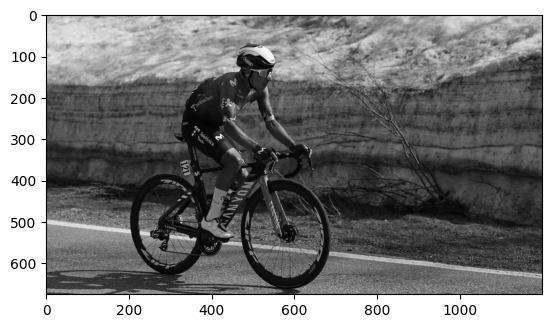

In [ ]:
input_img = Input(shape=(h,w,1))
x = Conv2D(1, (1,1), activation='relu', padding='same')(input_img)
#modelo1 = Model(inputs=input_img, outputs=x)

modelo1 = Model(input_img,x)
modelo1.set_weights([np.array([[[[100.0]]]],dtype=np.float32),np.array([-50],dtype=np.float32)])

img = img.reshape(1,675,1200,1)
img1 = modelo1.predict(img)

print(img1.shape)
plt.imshow(img1.reshape(675,1200),cmap='gray')
#modelo1.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
(1, 338, 600, 1)


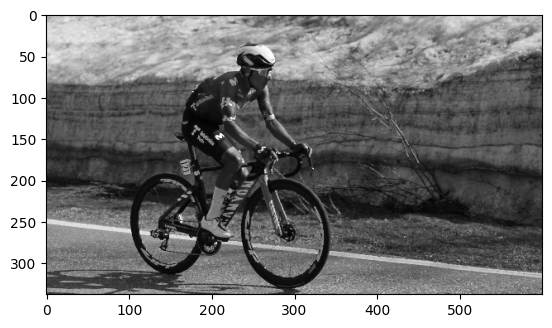

In [109]:
input_img = Input(shape=(h,w,1))
x = Conv2D(1, (1,1), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
#modelo1 = Model(inputs=input_img, outputs=x)

modelo1 = Model(input_img,x)
modelo1.set_weights([np.array([[[[100.0]]]],dtype=np.float32),np.array([-50],dtype=np.float32)])

img = img.reshape(1,675,1200,1)
img1 = modelo1.predict(img)

print(img1.shape)
plt.imshow(np.reshape(img1[0,:,:,0],(338,600,1)),cmap='gray')
#modelo1.summary()

La dimension del arreglo es (100, 200)
arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 100, 200, 2)


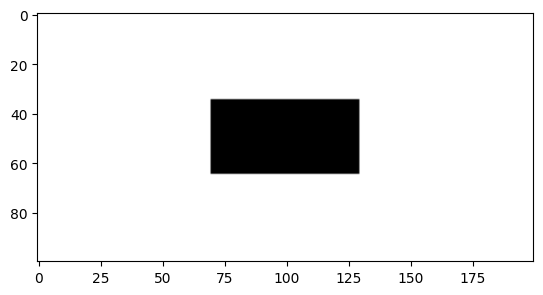

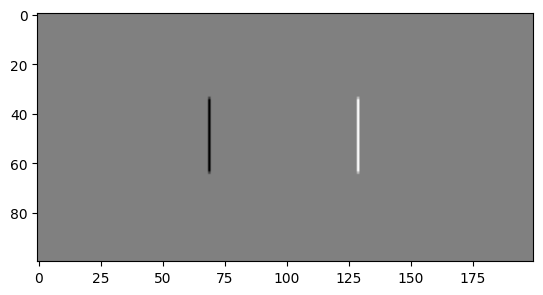

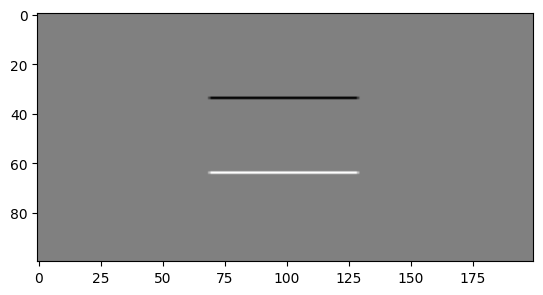

In [ ]:
def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

import numpy as np
import matplotlib.pyplot as plt

alto = 100
ancho = 200
mi_arreglo = np.zeros((alto,ancho))

print('La dimension del arreglo es',mi_arreglo.shape)
#mi_arreglo[20:80,40:160]=0.5
mi_arreglo[35:65,70:130]=1
plt.imshow(-mi_arreglo, cmap='gray')

input_img = Input(shape=(100,200,1))
x = Conv2D(2, (2,2), activation='linear', padding='same')(input_img)
modelo3 = Model(input_img,x)

filtro1 = [
    [1,-1],
    [1,-1]
]

filtro2 = [
    [1,1],
    [-1,-1]
]

filtros = reformar_filtros([filtro1, filtro2])

modelo3.set_weights([filtros,np.array([0,0],dtype=np.float32)])
img_mod3 = modelo3.predict(mi_arreglo.reshape(1,100,200,1))

print(img_mod3.shape)
img_filtered_1 = np.reshape(img_mod3[0,:,:,0],(100,200,1))
img_filtered_2 = np.reshape(img_mod3[0,:,:,1],(100,200,1))

plt.figure()
plt.imshow(img_filtered_1,cmap='gray')

plt.figure()
plt.imshow(img_filtered_2,cmap='gray')


La dimension del arreglo es (100, 200)
arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
(1, 100, 200, 3)


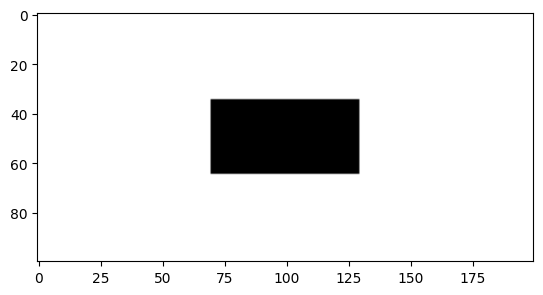

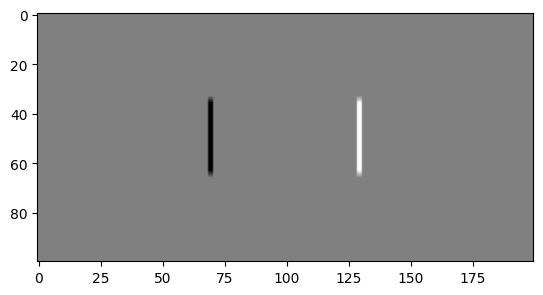

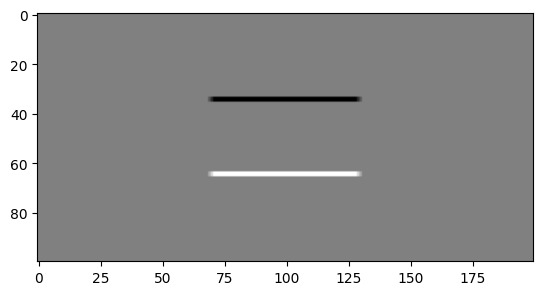

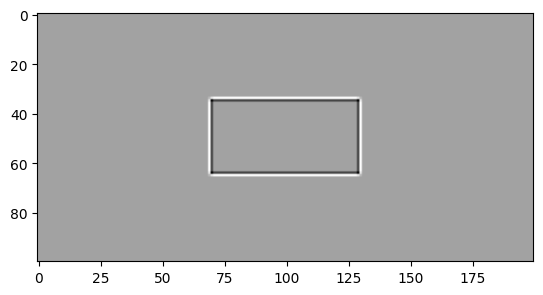

In [103]:
def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

import numpy as np
import matplotlib.pyplot as plt

alto = 100
ancho = 200
mi_arreglo = np.zeros((alto,ancho))

print('La dimension del arreglo es',mi_arreglo.shape)
#mi_arreglo[20:80,40:160]=0.5
mi_arreglo[35:65,70:130]=1
plt.imshow(-mi_arreglo, cmap='gray')

input_img = Input(shape=(100,200,1))
x = Conv2D(3, (3,3), activation='linear', padding='same')(input_img)
modelo4 = Model(input_img,x)

filtro1=[
      [ 1, 0,-1],
      [ 1, 0,-1],
      [ 1, 0,-1]]
filtro2=[
    [ 1, 1, 1],
    [ 0, 0, 0],
    [-1,-1,-1]]
filtro3=[
  [  1,  2,  1],
  [  2,-12,  2],
  [  1,  2,  1]]

filtros=reformar_filtros([filtro1,filtro2,filtro3])

modelo4.set_weights([filtros,np.array([0,0,0],dtype=np.float32)])
img_mod4 = modelo4.predict(mi_arreglo.reshape(1,100,200,1))

print(img_mod4.shape)
img_filtered_1_mod4 = np.reshape(img_mod4[0,:,:,0],(100,200,1))
img_filtered_2_mod4 = np.reshape(img_mod4[0,:,:,1],(100,200,1))
img_filtered_3_mod4 = np.reshape(img_mod4[0,:,:,2],(100,200,1))

plt.figure()
plt.imshow(img_filtered_1_mod4,cmap='gray')

plt.figure()
plt.imshow(img_filtered_2_mod4,cmap='gray')

plt.figure()
plt.imshow(img_filtered_3_mod4,cmap='gray')